In [27]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

In [28]:
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df = pd.read_pickle("../Datasets/matches_full.pkl")
df.head()

,date,comp,round,venue,result,gf,ga,opponent,xg,xga,...,crspa_average_opponent,tkl_average_opponent,tklw_average_opponent,blocks_average_opponent,int_average_opponent,clr_average_opponent,touches_average_opponent,att_y_average_opponent,succ_average_opponent,succ%_average_opponent
0,2019-09-20,Bundesliga,Matchweek 5,Away,L,1.0,2.0,Schalke 04,0.8,1.0,...,1.75,20.00,13.75,14.50,11.75,18.00,567.25,13.50,8.25,63.775
1,2019-09-20,Bundesliga,Matchweek 5,Home,W,2.0,1.0,Mainz 05,1.0,0.8,...,1.50,17.75,11.25,11.25,11.50,21.50,528.75,15.25,7.75,49.675
2,2019-09-21,Bundesliga,Matchweek 5,Away,D,1.0,1.0,Freiburg,1.0,1.3,...,2.00,14.75,8.25,11.75,6.50,19.25,505.00,16.00,9.50,59.925
3,2019-09-21,Bundesliga,Matchweek 5,Home,L,0.0,3.0,RB Leipzig,0.7,1.5,...,1.25,19.75,11.50,11.75,13.50,26.00,632.75,18.25,12.00,65.650
4,2019-09-21,Bundesliga,Matchweek 5,Away,W,3.0,0.0,Werder Bremen,1.5,0.7,...,1.25,11.50,8.00,7.00,5.75,15.75,650.00,9.50,6.00,63.825


In [3]:
df.shape

(2706, 145)

In [4]:
# train test
train = df.loc[:int(df.shape[0]*0.7)]
test = df.loc[int(df.shape[0]*0.7)+1:]

In [5]:
# selected stats from team
selected_stats_from_team = ['gf_average', 'ga_average', 'poss_average', 'sot%_average', 'saves_average', 
                  'stp_average', '#opa_average', 'kp_average', 'crspa_average', 
                  'tkl_average', 'blocks_average', 'int_average', 'att_y_average', 
                            'succ%_average', 'venue_encoded', 'team_encoded']

In [6]:
# select stats
selected_stats_from_opponent = [f"{stat}_opponent" for stat in selected_stats_from_team]
predictors = selected_stats_from_team + selected_stats_from_opponent
predictors.remove('venue_encoded_opponent')
predictors

['gf_average',
 'ga_average',
 'poss_average',
 'sot%_average',
 'saves_average',
 'stp_average',
 '#opa_average',
 'kp_average',
 'crspa_average',
 'tkl_average',
 'blocks_average',
 'int_average',
 'att_y_average',
 'succ%_average',
 'venue_encoded',
 'team_encoded',
 'gf_average_opponent',
 'ga_average_opponent',
 'poss_average_opponent',
 'sot%_average_opponent',
 'saves_average_opponent',
 'stp_average_opponent',
 '#opa_average_opponent',
 'kp_average_opponent',
 'crspa_average_opponent',
 'tkl_average_opponent',
 'blocks_average_opponent',
 'int_average_opponent',
 'att_y_average_opponent',
 'succ%_average_opponent',
 'team_encoded_opponent']

In [8]:
train.head()

,date,comp,round,venue,result,gf,ga,opponent,xg,xga,...,crspa_average_opponent,tkl_average_opponent,tklw_average_opponent,blocks_average_opponent,int_average_opponent,clr_average_opponent,touches_average_opponent,att_y_average_opponent,succ_average_opponent,succ%_average_opponent
0,2019-09-20,Bundesliga,Matchweek 5,Away,L,1.0,2.0,Schalke 04,0.8,1.0,...,1.75,20.00,13.75,14.50,11.75,18.00,567.25,13.50,8.25,63.775
1,2019-09-20,Bundesliga,Matchweek 5,Home,W,2.0,1.0,Mainz 05,1.0,0.8,...,1.50,17.75,11.25,11.25,11.50,21.50,528.75,15.25,7.75,49.675
2,2019-09-21,Bundesliga,Matchweek 5,Away,D,1.0,1.0,Freiburg,1.0,1.3,...,2.00,14.75,8.25,11.75,6.50,19.25,505.00,16.00,9.50,59.925
3,2019-09-21,Bundesliga,Matchweek 5,Home,L,0.0,3.0,RB Leipzig,0.7,1.5,...,1.25,19.75,11.50,11.75,13.50,26.00,632.75,18.25,12.00,65.650
4,2019-09-21,Bundesliga,Matchweek 5,Away,W,3.0,0.0,Werder Bremen,1.5,0.7,...,1.25,11.50,8.00,7.00,5.75,15.75,650.00,9.50,6.00,63.825


# Gridsearch CV

In [33]:
log_reg = LogisticRegression(max_iter=2000)
parameters = {'C':[0.01, 0.1, 1, 10, 100]}

In [34]:
clf = GridSearchCV(log_reg, param_grid=parameters)
clf.fit(train[predictors], train['result_encoded'])

GridSearchCV(estimator=LogisticRegression(max_iter=2000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [35]:
clf.best_params_

{'C': 0.1}

In [36]:
log_reg = LogisticRegression(penalty='l2', tol=0.0001, C=0.1, solver='lbfgs',
                             max_iter=1000, multi_class='auto', random_state=42)

In [37]:
log_reg.fit(train[predictors], train['result_encoded'])

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

# Prediction

In [50]:
# accuracy on test set

prob_preds = log_reg.predict_proba(test[predictors])
preds = log_reg.predict(test[predictors])
print("Accuracy on test set", accuracy_score(test['result_encoded'], preds))

Accuracy on test set 0.5104808877928483


In [51]:
# accuracy on training set
preds_on_training = log_reg.predict(train[predictors])
print("Accuracy on training set", accuracy_score(train['result_encoded'], preds_on_training))

Accuracy on training set 0.5150395778364116


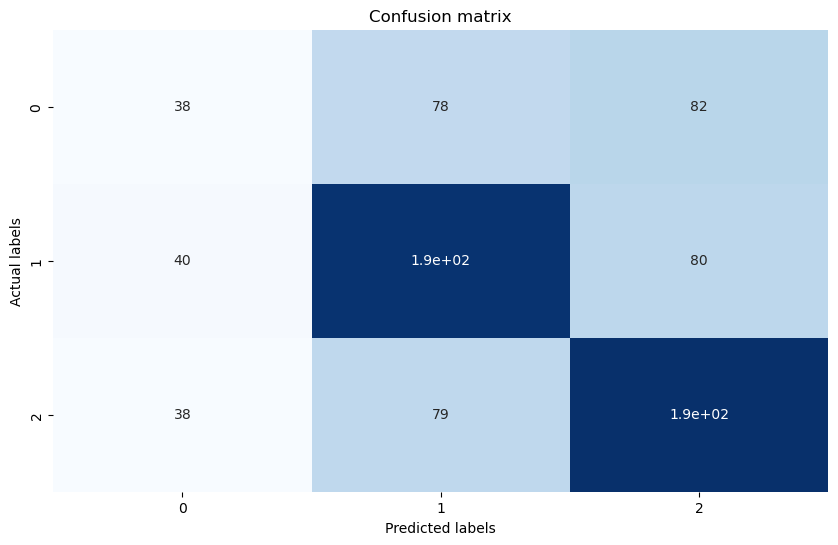

In [45]:
# confusion matrix
cm = confusion_matrix(test['result_encoded'], preds)
# plot
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion matrix')
plt.show()